# IMAGE SEGMENTATION USING UNSUPERVISED GAUSSIAN MIXTURE MODEL (GMM) CLUSTERING

Plant Cells Image

## 1. Importing Python Libraries

In [52]:
import numpy as np
import cv2

from sklearn.mixture import GaussianMixture as GMM

import matplotlib.pyplot as plt

print("Python Libraries Import Completed")

Python Libraries Import Completed


## 2. Importing the Image File

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Importing Image
image2 = cv2.imread("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Image_Segmentation_Using_UnSupervised_Gaussian_Mixture_Model_GMM_Clustering/data/plant_cells.jpg")

print("Image Import Completed")

Image Import Completed


## 3. Image Exploration

In [9]:
# Displaying the Imported Image

image2

array([[[ 16,  93,  49],
        [ 15,  94,  50],
        [ 17,  96,  52],
        ...,
        [ 12, 220, 220],
        [  0, 215, 218],
        [  5, 227, 231]],

       [[  9,  86,  42],
        [ 11,  88,  44],
        [ 12,  91,  47],
        ...,
        [ 18, 223, 221],
        [  2, 217, 218],
        [  3, 225, 227]],

       [[  7,  82,  38],
        [  7,  84,  40],
        [ 10,  87,  43],
        ...,
        [ 25, 226, 223],
        [  7, 217, 217],
        [  4, 219, 220]],

       ...,

       [[ 13, 208, 192],
        [ 12, 207, 191],
        [ 11, 206, 190],
        ...,
        [ 11, 122,  68],
        [  7, 121,  68],
        [  4, 121,  66]],

       [[ 11, 206, 190],
        [ 11, 206, 190],
        [ 10, 205, 189],
        ...,
        [ 11, 122,  70],
        [  6, 121,  71],
        [  2, 120,  67]],

       [[ 10, 205, 189],
        [ 10, 205, 189],
        [  9, 204, 188],
        ...,
        [  9, 120,  70],
        [  3, 118,  68],
        [  0, 115,  64]]

In [10]:
# Verifying the Type of the Image

type(image2)

numpy.ndarray

In [11]:
# Verifying the Shape of the Image

image2.shape

(630, 1200, 3)

## 4. Image Pre-Processing (Reshaping)

In [12]:
# Reshaping the Image

#image2_reshape = image2.reshape(630, 1200, 3)
image2_reshape = image2.reshape((-1, 3))

print("Execution Completed")

Execution Completed


In [13]:
# Displaying the Reshaped Image
image2_reshape

array([[ 16,  93,  49],
       [ 15,  94,  50],
       [ 17,  96,  52],
       ...,
       [  9, 120,  70],
       [  3, 118,  68],
       [  0, 115,  64]], dtype=uint8)

In [14]:
# Verifying the Type of the Reshaped Image

type(image2_reshape)

numpy.ndarray

In [15]:
# Verifying the Shape of the Reshaped Image

image2_reshape.shape

(756000, 3)

## 5. UnSupervised Clustering - Gaussian Mixture Model Fitting

### 5.1 GMM Clustering Default Parameters Configuration

In [35]:
# GMM Parameters Initial Configuration

n_components = 5
covariance_type = "full"
tol = 0.001
reg_covar = 0.000001
max_iter = 100
n_init = 1
init_params = "kmeans"
weights_init = None
means_init = None
precisions_init = None
random_state = None
warm_start = False
verbose = 0
verbose_interval = 10

print("Execution Completed")

Execution Completed


### 5.2 GMM Clustering Model Definition and Initiation

In [36]:
# Defining and Initiating an Instance of GMM Clustering Model

gmm_model = GMM(n_components=n_components, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, 
                 max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=weights_init, 
                 means_init=means_init, precisions_init=precisions_init, random_state=random_state, 
                 warm_start=warm_start, verbose=verbose, verbose_interval=verbose_interval)

print("Execution Completed")

Execution Completed


### 5.3 GMM Clustering Model Fitting

In [37]:
# Fitting the GMM Clustering Model

print("GMM Clustering Model Training Started...")

gmm_model.fit(image2_reshape)

print("GMM Clustering Model Training Completed...")

GMM Clustering Model Training Started...
GMM Clustering Model Training Completed...


### 5.3 GMM Clustering Model Predictions

In [38]:
# Evaluating the GMM Clustering Model Predictions

gmm_image2_predictions = gmm_model.predict(image2_reshape)

print("Execution Completed")

Execution Completed


In [39]:
# Displaying the Prediction Results

gmm_image2_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# verifying the Shape of the Predictions Array

gmm_image2_predictions.shape

(756000,)

### 5.4 Evaluating the Predictions Results

In [41]:
# Extracting the Original Image Shape before Reshaping
original_image2_shape = image2.shape

original_image2_shape

(630, 1200, 3)

In [42]:
original_image2_shape[0]

630

In [43]:
original_image2_shape[1]

1200

In [44]:
original_image2_shape[2]

3

In [45]:
# Reshaping the Original Image with the Predicted Cluster Labels

segmented_array2 = gmm_image2_predictions.reshape(original_image2_shape[0], original_image2_shape[1])

print("Execution Completed")

Execution Completed


In [46]:
# Displaying the Reshaped Segmented Array with Predictions 

segmented_array2

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]])

In [47]:
# Verifying the Shape of the Reshaped Segmented Array with Predictions 

segmented_array2.shape

(630, 1200)

In [48]:
# Verifying the First Data Instance of the Reshaped Segmented Array with Predictions 

segmented_array2[0]

array([0, 0, 0, ..., 2, 2, 2])

In [49]:
# Verifying the Shape of the First Data Instance of the Reshaped Segmented Array with Predictions 

segmented_array2[0].shape

(1200,)

### 5.5 Visualizing the Segmented Image with Clusters

In [50]:
# Visualizing the Segmented Image

segmented_image2 = cv2.imwrite("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Image_Segmentation_Using_UnSupervised_Gaussian_Mixture_Model_GMM_Clustering/results/segmented_plant_cells.jpg", segmented_array2)

print("Segmented Image Export Completed")

Segmented Image Export Completed


## 6. Identification of the Optimal Number of Segments/Clusters (Hyper Parameters) Using AIC/BIC Methods

**AIC - Akaike Information Criterion**

AIC = -2/N * LL + 2 * k/N

where, 

*   **N** is the number of examples in the training dataset

*   **LL** is the log-likelihood of the model on the training dataset

*   **k** is the number of parameters in the model.

**BIC - Bayesian Information Criterion**

BIC = -2 * LL + log(N) * k

where, 
*   **log()** has the base-e called the natural logarithm
*   **LL** is the log-likelihood of the model
*   **N** is the number of examples in the training dataset of the model
*   **k** is the number of parameters in the model

### 6.1 BIC Method - GMM Clustering Model Configuration, Definition and Fitting

In [53]:
# GMM Clutering Model Parameters Configuration

# Number of Components/Segments/Clusters
n_components = np.arange(1, 10)

covariance_type = "full"
tol = 0.001
reg_covar = 0.000001
max_iter = 100
n_init = 1
init_params = "kmeans"
weights_init = None
means_init = None
precisions_init = None
random_state = None
warm_start = False
verbose = 0
verbose_interval = 10

print("GMM Clustering Models Training For BIC Started...")

# GMM Clustering Models Definition and Fitting for Various Values of Components Ranging from 1 to 10
gmm_models_bic = [GMM(n_components=n, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, 
                    max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=weights_init, 
                    means_init=means_init, precisions_init=precisions_init, random_state=random_state, 
                    warm_start=warm_start, verbose=verbose, verbose_interval=verbose_interval).fit(image2_reshape) for n in n_components]

print("GMM Clustering Models Training For BIC Completed...")

GMM Clustering Models Training For BIC Started...
GMM Clustering Models Training For BIC Completed...


### 6.2 Displaying the GMM Clustering Models for Various Number of Components

In [55]:
# Displaying the GMM Clustering Models for Various Number of Components

gmm_models_bic

[GaussianMixture(),
 GaussianMixture(n_components=2),
 GaussianMixture(n_components=3),
 GaussianMixture(n_components=4),
 GaussianMixture(n_components=5),
 GaussianMixture(n_components=6),
 GaussianMixture(n_components=7),
 GaussianMixture(n_components=8),
 GaussianMixture(n_components=9)]

### 6.3a Method 1 : Displaying the BIC Values Computed for Various Number of Components

In [58]:
# Method 1 : Displaying the BIC Values Computed for Various Number of Components

# Creating an Empty List to Hold the BIC Values for the various Number of Components
bic_list = []

for m in gmm_models_bic:
  bic_value = m.bic(image2_reshape)
  bic_list.append(bic_value)

# Displaying the List of BIC Values Computed for the various Number of Components
bic_list

[21190241.044149183,
 19178904.73408575,
 18546167.040850945,
 18401655.79604901,
 18374479.624260258,
 18338880.004568245,
 18310492.41434655,
 18302028.98364402,
 17581275.450687107]

### 6.3b Method 2 : Displaying the BIC Values Computed for Various Number of Components

In [59]:
# Method 2 : Using List Comprehension - Displaying the BIC Values Computed for Various Number of Components

bic_list_method2 = [m.bic(image2_reshape) for m in gmm_models_bic]

# Displaying the List of BIC Values Computed for the various Number of Components
bic_list_method2

[21190241.044149183,
 19178904.73408575,
 18546167.040850945,
 18401655.79604901,
 18374479.624260258,
 18338880.004568245,
 18310492.41434655,
 18302028.98364402,
 17581275.450687107]

### 6.4 BIC Method - GMM Clustering Models - Visualising BIC Values for Various Number of Components

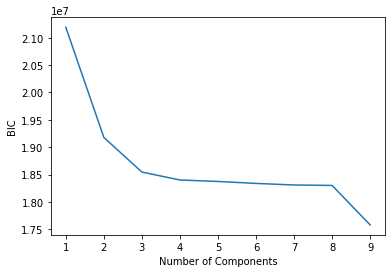

In [63]:
# Visualising BIC Values for Various Number of Components

plt.plot(n_components, bic_list, label='GMM Clustering Model : Number of Components versus BIC')
plt.xlabel('Number of Components')
plt.ylabel("BIC")

# Displaying the Plot Graph
plt.show()

As we can see from the above BIC results; the optimal number of components can be considered as either 3 or 4.

Let's proceed executing the optimal finalized GMM Clustering Model with 3 Components/Segments/Clusters.

## 7. GMM Clustering Optimal Finalized Model Implementation

### 7.1 GMM Clustering Optimal Finalized Model Configuration, Definition and Fitting

In [65]:
# GMM Clustering Optimal Finalized Model Configuration, Definition and Fitting

# GMM Clutering Model Parameters Configuration

# Optimal Finalized Number of Components/Segments/Clusters Identified Using the BIC Method
n_components = 3

covariance_type = "full"
tol = 0.001
reg_covar = 0.000001
max_iter = 100
n_init = 1
init_params = "kmeans"
weights_init = None
means_init = None
precisions_init = None
random_state = None
warm_start = False
verbose = 0
verbose_interval = 10

print("GMM Clustering Optimal Model Training For BIC Started...")

# GMM Clustering Optimal Finalized Model Definition
gmm_model_optimal = GMM(n_components=n_components, covariance_type=covariance_type, tol=tol, reg_covar=reg_covar, 
                        max_iter=max_iter, n_init=n_init, init_params=init_params, weights_init=weights_init, 
                        means_init=means_init, precisions_init=precisions_init, random_state=random_state, 
                        warm_start=warm_start, verbose=verbose, verbose_interval=verbose_interval)

# GMM Clustering Optimal Finalized Model Fitting
gmm_model_optimal.fit(image2_reshape)

print("GMM Clustering Optimal Model Training For BIC Completed...")

GMM Clustering Optimal Model Training For BIC Started...
GMM Clustering Optimal Model Training For BIC Completed...


### 7.2 GMM Clustering Optimal Finalized Model Predictions

In [66]:
# Evaluating the Predictions of the GMM Clustering Optimal Finalized Model

gmm_image2_optimal_predictions = gmm_model_optimal.predict(image2_reshape)

print("Execution Completed")

Execution Completed


In [68]:
# Displaying the Predictions of the GMM Clustering Optimal Finalized Model

gmm_image2_optimal_predictions

array([1, 1, 1, ..., 1, 1, 1])

### 7.3 Reshaping the Original Image with the Predicted Cluster Labels of the Optimal Finalized GMM Clustering Model

In [70]:
# Reshaping the Original Image with the Predicted Cluster Labels of the Optimal Finalized GMM Clustering Model

segmented_array2_optimal = gmm_image2_optimal_predictions.reshape(original_image2_shape[0], original_image2_shape[1])

# Displaying the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model
segmented_array2_optimal

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [71]:
# Verifying the Shape of the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model

segmented_array2_optimal.shape

(630, 1200)

In [72]:
# Verifying the First Data Instance of the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model

segmented_array2_optimal[0]

array([1, 1, 1, ..., 0, 0, 0])

In [73]:
# Verifying the Shape of the First Data Instance of the Segmented Array with Predictions of the Optimal Finalized GMM Clustering Model

segmented_array2_optimal[0].shape

(1200,)

### 7.4 Visualizing the Segmented Image with Clusters for the Optimal Finalized GMM Clustering Model

In [74]:
# Visualizing the Segmented Image with Clusters for the Optimal Finalized GMM Clustering Model

segmented_image2_optimal = cv2.imwrite("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Image_Segmentation_Using_UnSupervised_Gaussian_Mixture_Model_GMM_Clustering/results/segmented_optimal_plant_cells.jpg", segmented_array2_optimal)

print("Optimal Segmented Image Export Completed")

Optimal Segmented Image Export Completed
